# TMDb Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Tmdb Movies dataset describes the data collection of several columns including detailed information about the movies, genres, performers, movie budgets, user ratings and revenue. In this project we will be analyzing data associated with the movies and in particular we will be interested in finding trends and relationship(s) among the popular actors/actresses, genres and incomes. 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

### Question(s) for Analysis

In this project we will be analyzing data associated with such as movies, genres, performers, popularity and votes. In particular we will be interested in finding some questions about their relationships. 

Besides, to say in more detail we will be analyzing genres, actors/actresses and directors' performances and movies' net incomes according to this dataset. 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df=pd.read_csv(r'tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [115]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [116]:
df.shape

(10866, 21)

In [117]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning 

Now that my data is loaded, I checked some info about it as we can see above such as its columns, shape and types. After quick checking I will make the following changes on my data: 

* I will drop/remove some columns as I think of them that they are unnecessary for my analysis. 
I will drop the columns 'id', 'overview','budget', 'revenue','homepage','tagline' and 'release_date'. It may be weird when you 
see that I dropped 'budget' and 'revenue' but I will keep the columns 'budget_adj' and 'revenue_adj' and will use them for my 
analysis later in my questions. 

* I will check the NaN/missing values. I will drop some subsets such as 'cast', 'director', 'genres', 'imdb_id' because they are related to my analysis questions. I will try to find precise answers for my questions about cast (performers), directors and genres that is why I dropped these missing values. 

* As you can see I did not change the NaN/missing values in 'keywords' and 'production_companies' columns. I didn't remove the NaN/missing values in them because I didn't think these values would affect my analysis. 

* Lastly, I will drop the duplicated values and check my data shape again. 


In [118]:
df.drop(['id','overview','budget', 'revenue','homepage','tagline','release_date'],axis=1,inplace=True)
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [119]:
df.isnull().sum()

imdb_id                   10
popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [120]:
df.dropna(subset=['cast','director','genres','imdb_id'],inplace=True)
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [121]:
df.isna().sum()

imdb_id                    0
popularity                 0
original_title             0
cast                       0
director                   0
keywords                1423
runtime                    0
genres                     0
production_companies     956
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [122]:
df.duplicated().value_counts()

False    10726
True         1
dtype: int64

In [123]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts(), df.duplicated().sum()

(False    10726
 dtype: int64,
 0)

In [124]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,1.072600e+04,1.072600e+04
mean,0.652779,102.493660,219.905090,5.964218,2001.256013,1.777358e+07,5.203047e+07
std,1.004995,30.473355,578.934433,0.930185,12.821962,3.447220e+07,1.454547e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210766,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387135,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.721518,112.000000,148.000000,6.600000,2011.000000,2.112691e+07,3.475061e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

Question 1-Who Are The Most Popular Top 3 Performers According To The Appearances In The Movies ? 

In [125]:
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [126]:
performers=df['cast'].str.split('|')
performers

0        [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1        [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2        [Shailene Woodley, Theo James, Kate Winslet, A...
3        [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4        [Vin Diesel, Paul Walker, Jason Statham, Miche...
                               ...                        
10861    [Michael Hynson, Robert August, Lord 'Tally Ho...
10862    [James Garner, Eva Marie Saint, Yves Montand, ...
10863    [Innokentiy Smoktunovskiy, Oleg Efremov, Georg...
10864    [Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...
10865    [Harold P. Warren, Tom Neyman, John Reynolds, ...
Name: cast, Length: 10726, dtype: object

In [127]:
performers[0]

['Chris Pratt',
 'Bryce Dallas Howard',
 'Irrfan Khan',
 "Vincent D'Onofrio",
 'Nick Robinson']

In [128]:
#We see list in list in here so we can create a dict for our performers. 
dict={}
for stars in performers:
    for i in stars:
        if i in dict:
            dict[i]+=1
        else:
            dict[i]=1

In [129]:
list(dict.items())[0:10] #We see the first 10 items in our dictionary. 

[('Chris Pratt', 10),
 ('Bryce Dallas Howard', 7),
 ('Irrfan Khan', 6),
 ("Vincent D'Onofrio", 24),
 ('Nick Robinson', 5),
 ('Tom Hardy', 21),
 ('Charlize Theron', 31),
 ('Hugh Keays-Byrne', 3),
 ('Nicholas Hoult', 10),
 ('Josh Helman', 1)]

In [130]:
#To get the most popular 10 we need to sort them 
performers=sorted(dict.items(),key=lambda x:x[1],reverse=True) #We sort by value in here and reverse flag can be set to request the result in descending order.
performers[0:10]

[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53),
 ('Robin Williams', 51),
 ('John Cusack', 50),
 ('John Goodman', 49),
 ('Morgan Freeman', 49),
 ('Liam Neeson', 48)]

In [131]:
#We can use this as a function like this 
def get_number(df): #Our original df in here we need to parse
    a=df.str.split('|')
    dict ={}
    for stars in a:
        for i in stars:
            if i in dict:
                dict[i]+=1
            else:
                dict[i]=1                
    return sorted(dict.items(),key=lambda x:x[1],reverse=True)

In [132]:
get_number(df['cast'])[0:10]

[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53),
 ('Robin Williams', 51),
 ('John Cusack', 50),
 ('John Goodman', 49),
 ('Morgan Freeman', 49),
 ('Liam Neeson', 48)]

In [133]:
x=[] #To define axes of plot
y=[]

for i in performers[0:10]:
    x.append(i[0]),y.append(i[1])

In [134]:
print(x,y)

['Robert De Niro', 'Samuel L. Jackson', 'Bruce Willis', 'Nicolas Cage', 'Michael Caine', 'Robin Williams', 'John Cusack', 'John Goodman', 'Morgan Freeman', 'Liam Neeson'] [72, 71, 62, 61, 53, 51, 50, 49, 49, 48]


In [135]:
df_perf=pd.DataFrame(zip(x,y))
df_perf.columns=['name','number_of_appearances']
df_perf.set_index('name', inplace=True)
df_perf.head(5)

,number_of_appearances
name,
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
Nicolas Cage,61
Michael Caine,53


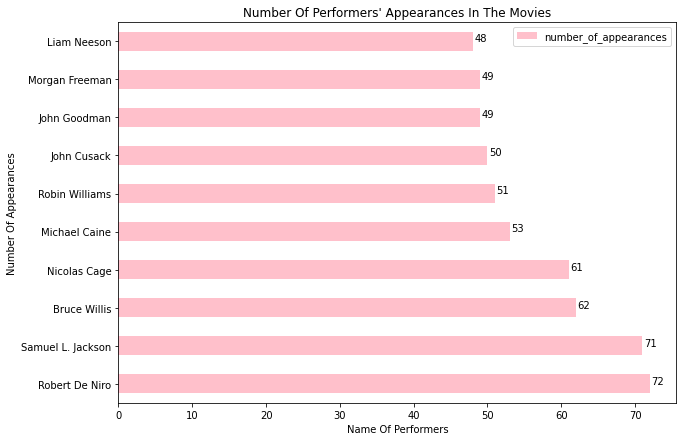

In [136]:
fig=df_perf.plot(kind='barh',color='pink',figsize=(10,7))
plt.xlabel('Name Of Performers')
plt.ylabel('Number Of Appearances')

for i, v in enumerate(df_perf['number_of_appearances']):
    plt.annotate(str(v), xy=(v+0.19, i))
plt.title("Number Of Performers' Appearances In The Movies")
plt.show()

We can infere from this plot that the top 3 performers are Robert De Niro, Samuel L. Jackson and Bruce Willis.

Question 2-Which Genres Are The Most Common In Movies According To Their Top 5 Popularity ? (Top 3)

In [137]:
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [138]:
df_popularity=df.sort_values(by='popularity',ascending=False) #In here we got the top 5 movies based on their popularity. Now we will check their genres. 
df_popularity.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
629,tt0816692,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014,1.519800e+08,5.726906e+08
630,tt2015381,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,5612,7.9,2014,1.565855e+08,7.122911e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [139]:
get_number(df_popularity.head(5)['genres'])[0:3] #We use our function we created above "get_number" and we can see in here the top 3 genres are Adventure, Science Fiction and Action. 

[('Adventure', 5), ('Science Fiction', 5), ('Action', 3)]

Question 3-What Is The Correlation Between Vote Average And Net Income Of The Movies ? Is It A Strong Relationship or Not ?

In [140]:
df['net_income']=df['revenue_adj']-df['budget_adj'] #First we need to calculate the "net_income" in here.

In [141]:
df_corr=df[['net_income','vote_average']].corr(method='pearson')
df_corr

,net_income,vote_average
net_income,1.000000,0.203138
vote_average,0.203138,1.000000


<AxesSubplot:>

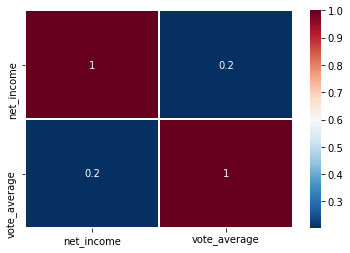

In [142]:
#We can see the correlation between vote_average and net_income clearly in here
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,cmap='RdBu_r',annot=True, linewidth=0.63)

In this heatmap, we see that the correlation between the vote_average and net_income that they are not statistically significant. We can see that the linear relationship is not very strong too with the correlation coefficient value. (~0.2). Plus, if we would like to deep more we may check our p-value in here as well or maybe we may use a residual plot to see more insights about the relationship about the vote_average and net_income of this dataset.

Question 4 -Which Director's Movie Are The Most Voted In This Dataset ? 

In [143]:
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [144]:
df_directors=df.groupby('director',as_index=False)['vote_count'].sum()
df_directors.head()

,director,vote_count
0,FrÃ©dÃ©ric Jardin,28
1,A. Todd Smith,11
2,A.R. Murugadoss,53
3,Aaron Aites,13
4,Aaron Blaise|Robert Walker,753


In [145]:
df_directors.sort_values(by='vote_count',ascending=False).head(5) #We see in here that Christopher Nolan's movie has 41759 votes. 

,director,vote_count
837,Christopher Nolan,41759
4557,Steven Spielberg,36735
3762,Peter Jackson,31796
3860,Quentin Tarantino,27894
3995,Ridley Scott,24801


Question 5-Are Most Popular Movies Have Big Incomes ? 

In [146]:
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


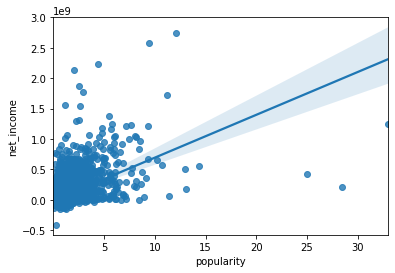

In [147]:
sns.regplot(data=df,x='popularity',y='net_income');

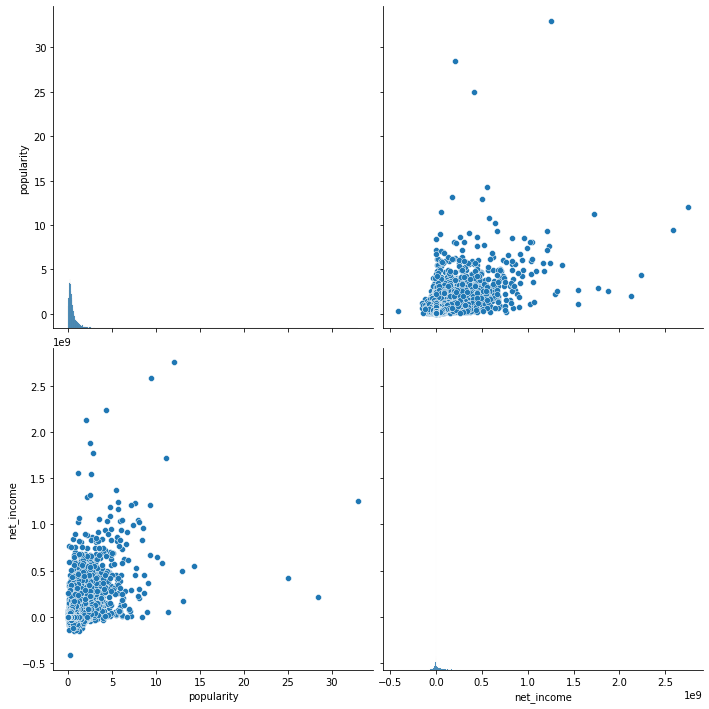

In [148]:
sns.pairplot(data=df[['popularity','net_income']],kind='scatter',height=5)

In [149]:
df_corr=df[['net_income','popularity']].corr(method='pearson')
df_corr

,net_income,popularity
net_income,1.000000,0.562348
popularity,0.562348,1.000000


In these plots we can clearly see that some movies have popularity between 5 and 15 and they have most of the incomes. When we check the other data points we can say that they have somewhat significant positive correlation between popularity and net income. 

Question 6-Which is The Most Popular Genre In 2013, 2014 and 2015 ? (Last 3 Years For This Dataset)

In [150]:
df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [151]:
gr_data=df[['genres','release_year']]
gr_data.head()

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015
2,Adventure|Science Fiction|Thriller,2015
3,Action|Adventure|Science Fiction|Fantasy,2015
4,Action|Crime|Thriller,2015


In [152]:
years_set=set() #This will be our index later in the dataframe.
years=gr_data['release_year'].drop_duplicates()
for year in years:
    if year not in years_set:
        years_set.add(year) #We can not use append here, because this is a "set".       
print(years_set,len(years_set))
#years_set=df['release_year'].unique() We can use unique method also in here. 
#years_set

{1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015} 56


In [153]:
genres=set() #This will be our columns later in the dataframe. 
for year in years_set:
    genre_data=gr_data[gr_data['release_year']==year]['genres']
    for i in genre_data:
        for genre in i.split('|'):
            if genre not in genres:
                genres.add(genre)
print(genres,len(genres))

{'Music', 'Documentary', 'Foreign', 'Romance', 'Mystery', 'Adventure', 'Western', 'Animation', 'Action', 'Science Fiction', 'TV Movie', 'Comedy', 'Fantasy', 'Family', 'Crime', 'Horror', 'History', 'War', 'Thriller', 'Drama'} 20


In [154]:
genre_df=pd.DataFrame(index=years_set,columns=genres) #We have defined our dataframe in here. 
genre_df[:]=0 #We have added value 0 to make calculation.
genre_df.head()

,Music,Documentary,Foreign,Romance,Mystery,Adventure,Western,Animation,Action,Science Fiction,TV Movie,Comedy,Fantasy,Family,Crime,Horror,History,War,Thriller,Drama
1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
for year in years_set: #years_set 
    dict_genres={}
    genre_data=gr_data[gr_data['release_year']==year]['genres']
    for i in genre_data:
        for genre in i.split('|'):
            if genre in dict_genres:
                dict_genres[genre]+=1
            else:
                dict_genres[genre]=1
                
    df_dict_genres=pd.DataFrame(dict_genres, index=[year]) #We have created our dict_genres dataframe in here. 
    genre_df.loc[year,df_dict_genres.columns]= genre_df.loc[year,df_dict_genres.columns] + df_dict_genres.loc[year,df_dict_genres.columns] #We have filled our genre_df dataframe in here.

In [156]:
genre_df.head(5) #When we quickly check we see that drama has a domination on this dataset. We will check this now.

,Music,Documentary,Foreign,Romance,Mystery,Adventure,Western,Animation,Action,Science Fiction,TV Movie,Comedy,Fantasy,Family,Crime,Horror,History,War,Thriller,Drama
1960,1,0,1,6,0,5,6,0,8,3,0,8,2,3,2,7,5,2,6,13
1961,2,0,1,7,1,6,3,1,7,4,0,10,2,5,2,3,3,2,0,16
1962,1,0,1,5,4,7,3,0,8,2,0,5,1,2,3,5,4,3,7,21
1963,0,0,2,8,6,7,2,1,4,2,0,13,2,3,4,9,4,1,10,13
1964,5,0,1,9,4,5,1,2,5,4,0,16,4,4,10,6,3,3,9,20


In [159]:
list(genre_df)
genre_df[list]=genre_df[list].astype(int) #We changed our columns type to int. 

In [160]:
genre_df.idxmax(axis=1).values

array(['Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy',
       'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
       'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
       'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy',
       'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy',
       'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy',
       'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
       'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama'],
      dtype=object)

In [161]:
genre_df.apply(max,axis=1).values #genre_df.max(axis=1).values

array([ 13,  16,  21,  13,  20,  20,  16,  17,  19,  13,  19,  30,  16,
        31,  21,  17,  22,  23,  29,  30,  32,  32,  33,  35,  40,  51,
        51,  57,  69,  63,  60,  63,  65,  90,  88,  93, 104,  83, 108,
       113, 100, 101, 129, 111, 141, 182, 196, 195, 232, 222, 208, 213,
       231, 253, 284, 260])

In [162]:
genre_max_data=[genre_df.idxmax(axis=1).values, genre_df.apply(max,axis=1).values]
genre_max_data

[array(['Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy',
        'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
        'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
        'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy',
        'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy',
        'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy',
        'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
        'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama'],
       dtype=object),
 array([ 13,  16,  21,  13,  20,  20,  16,  17,  19,  13,  19,  30,  16,
         31,  21,  17,  22,  23,  29,  30,  32,  32,  33,  35,  40,  51,
         51,  57,  69,  63,  60,  63,  65,  90,  88,  93, 104,  83, 108,
        113, 100, 101, 129, 111, 141, 182, 196, 195, 232, 222, 208, 213,
        231, 253, 284, 260])]

In [163]:
most_genres_df=pd.DataFrame(data=genre_max_data, columns=genre_df.index,index=['Genre Type','Counts Of Genre Type'])
most_genres_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Genre Type,Drama,Drama,Drama,Comedy,Drama,Drama,Comedy,Comedy,Drama,Drama,...,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
Counts Of Genre Type,13,16,21,13,20,20,16,17,19,13,...,196,195,232,222,208,213,231,253,284,260


In [67]:
most_genres_df.loc[['Genre Type','Counts Of Genre Type'],[2011,2012,2013,2014,2015]] #Last 5 years

,2011,2012,2013,2014,2015
Genre Type,Drama,Drama,Drama,Drama,Drama
Counts Of Genre Type,213,231,253,284,260


In [68]:
mgenres_df_sorted=most_genres_df.transpose().sort_values(by='Counts Of Genre Type',ascending=False)
mgenres_df_sorted.head(5) 

,Genre Type,Counts Of Genre Type
2014,Drama,284
2015,Drama,260
2013,Drama,253
2008,Drama,232
2012,Drama,231


According to our dataframe we see that " Drama " movies are on the top and it is the most popular genre type. When we check the years we see that 2014, 2015 and 2013 are on the top 3 years also.

<a id='conclusions'></a>
## Conclusions

You can infer so many information from this "Tmdb Movies Dataset". It has so many interesting parts when you check the overall dataset. So many questions can be answered with this movie dataset because it has so many detailed info parts in it. 

In our analysis we saw that top three actors were "Robert De Niro","Samuel L. Jackson" and "Bruce Willis" performed in the movies. Plus, we see that "Adventure", "Science Fiction" and "Action" genres are very common according to the movie's top 5 popularity info in this dataset and "Christopher Nolan"' s movies are the most voted movies. 

I have encountered some interesting conclusions in this dataset also. For example when I first quickly checked the dataset at the beginning I thought that if a movie had an above average popularity its income would be very high too. But it does not look like equal to this conclusion in this dataset regarding our analysis. Oppositely, the net income of popular movies is not as high as their popularity. Another interesting conclusion is "Drama" genre type has a really very dominance in this dataset. And directors might think that if they would plan to shoot a film in the future they could think to add more "Drama" scenes or more "Drama" included stages in their scenario as the dominance of "Drama" genre type seen in this dataset.

### Limitations

In this dataset you may encounter some null values. In my opinion you have to really carefully handle these null values because it may affect your analysis if you handle them in the wrong way. Because your analysis may skew and may cause some unintentionally biased results too.

When I first look at the dataset I see the "cast" column a little bit complicated. It would be nice if we might see the performers whether or not they are male/female. Because with regards to their gender, we may get some good conclusions in our analysis of different categories in this dataset. Additionaly, it could be good if we might see the the location of the movies' shot. Hereby, our analysis could reach around the location info also. We might see the distribution of the movies based on the city/country etc.

Finally, in this dataset I would like to see the info of a movie whether or not it had series. Because with this info I would like to try to guess maybe net-income or rating score regarding to the movies' series. Then I would like to compare these conclusions of the movies which has/has not series or any following movie series too.